In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# import data from processed_data.csv
df = pd.read_csv('small_set_processed_data.csv')

# drop rows with NaN
df = df.dropna()

# split into X and y
X = df.drop('condition', axis=1)
y = df['condition']

# convert from boolean to int
y = y.astype(int)
X = X.astype(float)

In [3]:
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [4]:
# train logistic regression model on training data
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

# predict on test data
y_pred = logistic_regression.predict(x_test)

# compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5127144474440477


/Users/alexisfrankson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# optimize logistic regression model
from sklearn.model_selection import GridSearchCV

# perform grid search
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
logistic_regression = LogisticRegression()
clf = GridSearchCV(logistic_regression, parameters, cv=5, verbose=0)
clf.fit(x_train, y_train)

# print best parameter after tuning
print(clf.best_params_)

# print how our model looks after hyper-parameter tuning
print(clf.best_estimator_)
logistic_regression = LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                                            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
                                            random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# predict on test data
y_pred = logistic_regression.predict(x_test)

# compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

/Users/alexisfrankson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexisfrankson/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

{'C': 0.01}
LogisticRegression(C=0.01)


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [5]:
# initialize logistic regression model parameters
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)   

# create empty accuracy list
accuracy = []

# loop through parameters
for p in penalty:
    for c in C:
        # initialize logistic regression model
        logistic_regression = LogisticRegression(penalty=p, C=c, solver='liblinear')
        
        # fit model
        logistic_regression.fit(x_train, y_train)
        
        # predict on test data
        y_pred = logistic_regression.predict(x_test)
        
        # compute accuracy
        accuracy.append(accuracy_score(y_test, y_pred))

# plot accuracy
plt.plot(accuracy)
plt.show()

/Users/alexisfrankson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexisfrankson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexisfrankson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexisfrankson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexisfrankson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/alexisfrankson/opt/anaconda3

NameError: name 'max_accuracy_index' is not defined

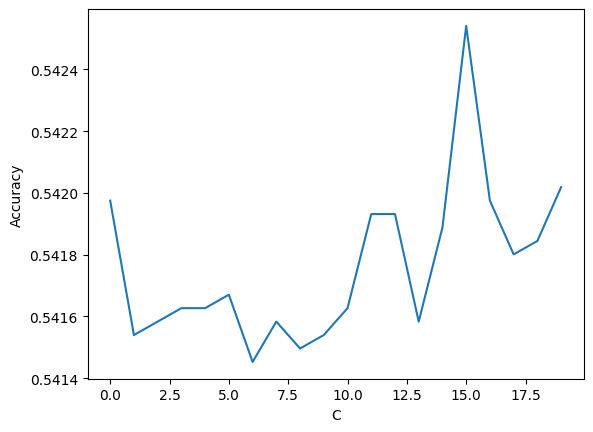

In [7]:
# plot accuracy
plt.plot(accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()